In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 5,random_state = 3)

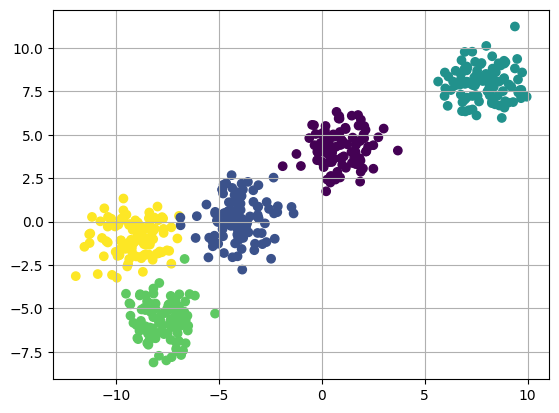

In [3]:
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1],c = y)
plt.show()

In [4]:
k = 5

colors = ['green','yellow','blue','cyan','red']

clusters = {}

for idx in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : [],
        'color' : colors[idx]
    }
    
    clusters[idx] = cluster

In [5]:
clusters

{0: {'center': array([-1.61130804, -6.2596415 ]),
  'points': [],
  'color': 'green'},
 1: {'center': array([0.24541282, 9.71348893]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([ 9.23880624, -5.38176597]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([ 3.69456477, -2.61393762]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([6.61489687, 9.41604003]), 'points': [], 'color': 'red'}}

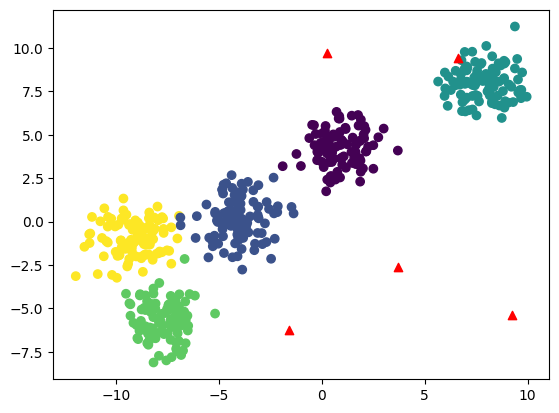

In [6]:
plt.scatter(X[:,0],X[:,1],c = y)

for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

In [7]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [8]:
v1 = np.array([1,2])
v2 = np.array([3,4])
distance(v1,v2)

2.8284271247461903

In [9]:
#Implementing E step 
def assign_clusters():
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X[idx]
        
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
        
        
        
#Implementing the M-Step
def update_clusters():
    for idx in range(k):
        pts = np.array(clusters[idx]['points'])
        if pts.shape[0] > 0:
            new_center = pts.mean(axis =0)
            clusters[idx]['center'] = new_center
            
            clusters[idx]['points'] = []
    
def plot_clusters():
    for i in clusters:
        pts = np.array(clusters[i]['points'])
        try : 
            plt.scatter(pts[:,0],pts[:,1],c=clusters[i]['color'])
        except:
            pass
        center = clusters[i]['center']
        plt.scatter(center[0],center[1],c = 'black',marker = '^')

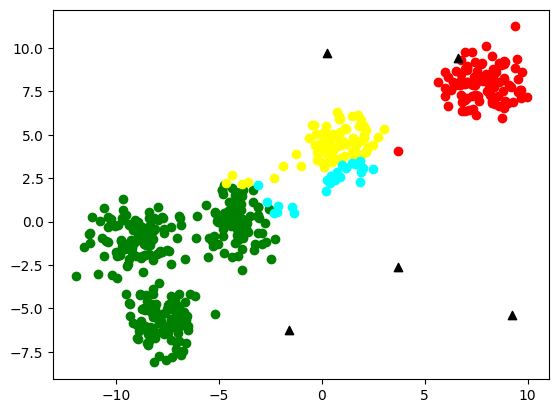

In [10]:
assign_clusters()
plot_clusters()
update_clusters()

## Scikit Learn  K - Means

In [11]:
from sklearn.cluster import KMeans

In [34]:
km = KMeans(n_clusters = 5)

In [35]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 10,random_state = 3)

In [36]:
km.fit(X,y)

/Users/jaswanth/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [37]:
centers = km.cluster_centers_
centers.shape

(5, 2)

In [38]:
labels = km.labels_
labels.shape

(500,)

In [39]:
labels

array([0, 4, 3, 3, 3, 2, 4, 3, 3, 3, 3, 0, 2, 4, 3, 0, 3, 2, 4, 0, 0, 1,
       0, 2, 2, 4, 3, 0, 4, 2, 0, 1, 2, 0, 0, 1, 1, 3, 3, 3, 4, 3, 2, 3,
       4, 0, 3, 4, 3, 0, 0, 3, 3, 0, 2, 1, 0, 3, 0, 3, 2, 4, 3, 0, 4, 1,
       0, 4, 3, 3, 3, 3, 0, 3, 4, 0, 1, 4, 1, 3, 3, 0, 4, 1, 4, 4, 4, 1,
       4, 0, 0, 0, 4, 3, 0, 0, 0, 0, 3, 0, 1, 0, 3, 1, 3, 3, 3, 1, 2, 3,
       0, 1, 1, 2, 0, 4, 2, 0, 3, 4, 2, 4, 4, 4, 0, 4, 3, 0, 4, 4, 3, 0,
       1, 1, 0, 3, 4, 3, 4, 3, 0, 4, 0, 1, 3, 0, 1, 2, 0, 0, 4, 3, 3, 4,
       0, 3, 2, 3, 1, 3, 3, 1, 2, 2, 0, 3, 3, 0, 1, 4, 2, 0, 3, 3, 1, 3,
       3, 3, 4, 1, 4, 0, 1, 4, 3, 0, 0, 4, 0, 3, 0, 4, 3, 0, 0, 2, 0, 2,
       0, 2, 4, 0, 3, 0, 0, 2, 4, 0, 0, 0, 3, 0, 2, 0, 4, 2, 0, 3, 4, 0,
       2, 0, 3, 1, 4, 4, 0, 0, 2, 3, 0, 0, 1, 3, 3, 0, 4, 0, 3, 0, 0, 4,
       0, 4, 2, 4, 4, 4, 3, 0, 2, 3, 3, 4, 2, 2, 0, 3, 4, 4, 1, 2, 0, 0,
       4, 3, 3, 2, 0, 4, 3, 0, 2, 0, 3, 3, 4, 3, 4, 0, 3, 3, 0, 0, 3, 3,
       3, 4, 0, 0, 4, 0, 2, 1, 0, 2, 0, 0, 1, 3, 3,

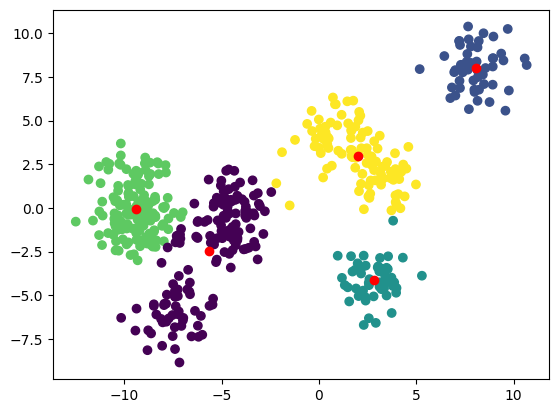

In [43]:
plt.scatter(X[:,0],X[:,1] ,c=labels)
plt.scatter(centers[:,0], centers[:,1], c='red')
plt.show()